        sseqid
0  NM_020153.4
1   AC231769.2
        sseqid
0  NM_020153.4
1   AC231769.2
NM_020153.4    1
AC231769.2     1
Name: sseqid, dtype: int64
NM_020153.4    1
AC231769.2     1
Name: sseqid, dtype: int64
120
120


/tmp/ipykernel_7144/2028801623.py:228: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sseq_count = sseq_count_series3.append(ser)


                                              sseqid  count
0  Homo sapiens intraflagellar transport 46 (IFT4...      1
1  Homo sapiens FOSMID clone ABC13-910122L2 from ...      1
2                                              Other      0


/tmp/ipykernel_7144/2028801623.py:263: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sseq_count2 = sseq_count_series6.append(ser2)
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


                                              sseqid  count
0  Homo sapiens intraflagellar transport 46 (IFT4...      1
1  Homo sapiens FOSMID clone ABC13-910122L2 from ...      1
2                                              Other      0


/tmp/ipykernel_7144/2028801623.py:341: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  fig.tight_layout(pad=5.0)


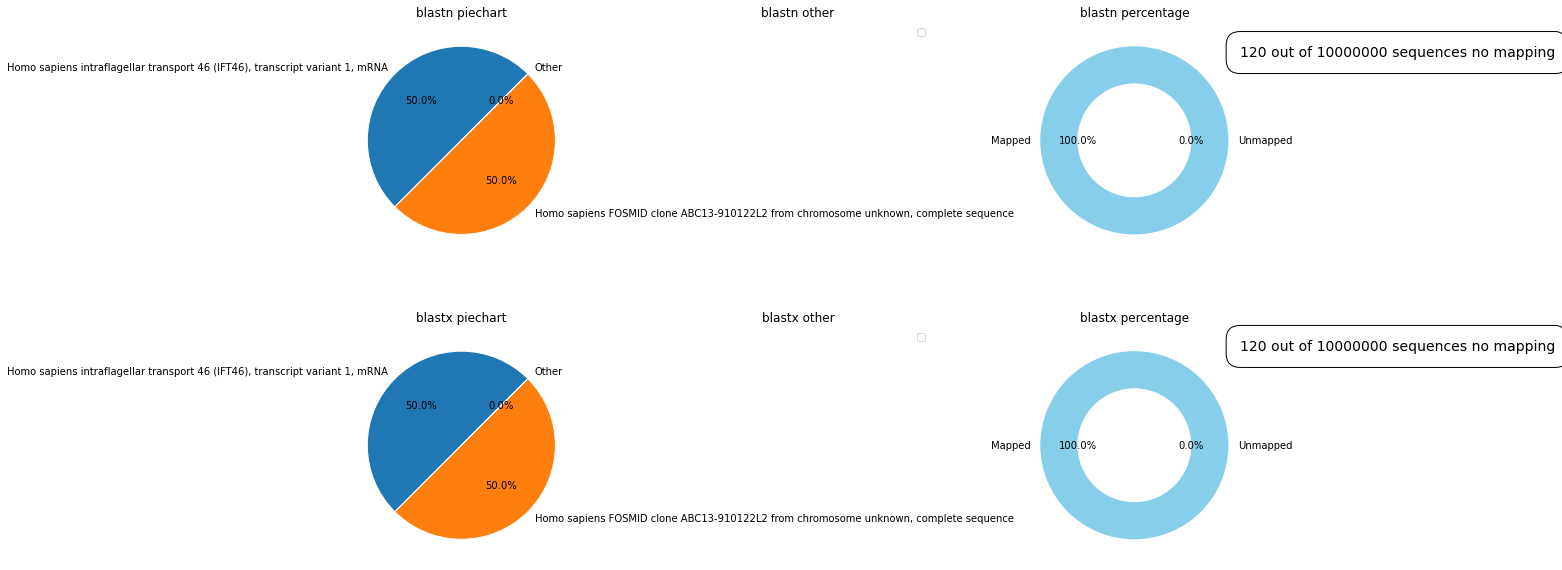

<Figure size 432x288 with 0 Axes>

In [7]:
#select intepreter and change environment to anaconda
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import xmltodict
from xml.dom import minidom
import time


#handles command line input parameter
import sys
import os

# testing file is from 10,000,000 reads, so mapping percentage is expected to be out of 10 mil
blast_tsv_file = 'test3.tsv'
blast_tsv_file2 = 'test3.tsv'
piePath = 'Combined.png'
piePathSample = os.path.splitext(piePath)[0]
piePathSample2 = os.path.split(piePathSample)
pieName = piePathSample2[1]

#ncbi query functions
def esearch(term, db='gds'):
    """
    Queries NCBI using the esearch utility. GEO ('gds') database is used as default for search term.
    """
    url = f'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?db={db}&term={term}&retmax=5000&usehistory=y'
    response = urllib.request.urlopen(url)
    return response.read()


def get_esummary(esearch_string, db='gds'):
    """
    Parses a http response in XML format to obtain the webenv and querykey tokens.
    Uses NCBI eutils to transform these tokens into web summaries of GEO (db='gds') datasets.
    """
    xmldoc = minidom.parseString(esearch_string)
    try:
        webenv = xmldoc.getElementsByTagName('WebEnv')[0].firstChild.data
        querykey = xmldoc.getElementsByTagName('QueryKey')[0].firstChild.data
        host = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi'
        params = f'?db={db}&version=2.0&query_key={querykey}&WebEnv={webenv}'
        url = host + params
        response = urllib.request.urlopen(url)
        return response.read()
    except IndexError as e:
        print(f"Unparsable publication string ({e}, search={esearch_string}")
        return ""

#matplotlib to build the piechart
fig, ((ax1, ax2, ax5), (ax3, ax4, ax6)) = plt.subplots(2, 3, figsize=(9, 5))
fig.tight_layout(h_pad=2)
plt.subplots_adjust(bottom=0, right=1.5, top=1.5)
ax1.set_title('blastn piechart')
ax2.set_title('blastn other')
ax3.set_title('blastx piechart')
ax4.set_title('blastx other')
ax5.set_title('blastn percentage')
ax6.set_title('blastx percentage')





# Read the blast n file
df = pd.read_csv(blast_tsv_file, header=None, sep='\t')
num_seqs = df.size
df.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']

df2 = df[['qseqid','sseqid','evalue']].copy()

# Read the blast x file
df4 = pd.read_csv(blast_tsv_file2, header=None, sep='\t')
num_seqs2 = df4.size
df4.columns = ['qseqid','sseqid','pident','length','mismatch','gapopen','qstart','qend','sstart','send','evalue','bitscore']





### still need to reorganize the code for each different file below.


#blast n output default is by best hit/lowest e value score, therefore add the first sseqid result for each qseqid
sseqid_list1 = []
qseqid_list1 = []
for idx in df.index:
        if df['qseqid'][idx] not in qseqid_list1:
                qseqid_list1.append(df['qseqid'][idx])
                sseqid_list1.append(df['sseqid'][idx])
sseqid_np1 = np.array(sseqid_list1)

#blast x output default is by best hit/lowest e value score, therefore add the first sseqid result for each qseqid
sseqid_list2 = []
qseqid_list2 = []
for idx in df4.index:
        if df4['qseqid'][idx] not in qseqid_list2:
                qseqid_list2.append(df4['qseqid'][idx])
                sseqid_list2.append(df4['sseqid'][idx])
sseqid_np2 = np.array(sseqid_list2)

df3 = pd.DataFrame(data = sseqid_np1, columns=['sseqid'])
print(df3)

df5 = pd.DataFrame(data = sseqid_np2, columns=['sseqid'])
print(df5)

sseq_count_series1 = df3['sseqid'].value_counts()
print(sseq_count_series1)

sseq_count_series4 = df5['sseqid'].value_counts()
print(sseq_count_series4)

#loop through series to determine which elements to remove and add into "other" column
to_remove1 = []
other_count1 = 0
otherDict1 = {}
to_remove2 = []
other_count2 = 0
otherDict2 = {}

#blastn number mapped
print(num_seqs)

#blastx number mapped
print(num_seqs2)

#taking 1% of number of sequences for blast n
for index,values in sseq_count_series1.iteritems():
        if(values < (0.001)*(num_seqs)):
                to_remove1.append(index)
                other_count1 += values
                otherDict1[values] = index

#taking 1% of number of sequences for blast x
for index,values in sseq_count_series4.iteritems():
        if(values < (0.001)*(num_seqs2)):
                to_remove2.append(index)
                other_count2 += values
                otherDict2[values] = index

otherAnswer1 = []
increment1 = 0
for key,value in sorted(otherDict1.items(),reverse=True):
        if increment1 <= 2:
                otherAnswer1.append((key,value))
                increment1+=1
        else:
             break              
                
otherAnswer2 = []
increment2 = 0
for key,value in sorted(otherDict2.items(),reverse=True):
        if increment2 <= 2:
                otherAnswer2.append((key,value))
                increment2+=1
        else:
             break

gene_ratios = []
gene_labels = []  
gene_labels_raw = []  

for idx in range(len(otherAnswer1)):
        gene_ratios.append(otherAnswer1[idx][0]/other_count1)
        gene_labels_raw.append(otherAnswer1[idx][1])

#replace index sseqids with ncbi name
for idx in range(len(gene_labels_raw)):
        term = str(gene_labels_raw[idx])
        print(term)
        esearch_string = esearch(term=term, db='nucleotide')
        time.sleep(0.1)
        result = get_esummary(esearch_string=esearch_string, db='nucleotide')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        gene_labels.append(sseq_name)                          
                
gene_ratios2 = []
gene_labels2 = []
gene_labels_raw2 = []

for idx in range(len(otherAnswer2)):
        gene_ratios2.append(otherAnswer2[idx][0]/other_count2)
        gene_labels_raw2.append(otherAnswer2[idx][1])

#replace index sseqids with ncbi name
for idx in range(len(gene_labels_raw2)):
        term = str(gene_labels_raw2[idx])
        print(term)
        esearch_string = esearch(term=term, db='nucleotide')
        time.sleep(0.1)
        result = get_esummary(esearch_string=esearch_string, db='nucleotide')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        gene_labels2.append(sseq_name) 
               
                

#remove these elements from series
sseq_count_series2 = sseq_count_series1.drop(to_remove1)
sseq_count_series5 = sseq_count_series4.drop(to_remove2)

sseq_name_list = []
sseqid = []
#replace index sseqids with ncbi name
for index,values in sseq_count_series2.iteritems():
        sseqid.append(index)
        term = str(index)
        esearch_string = esearch(term=term, db='nucleotide')
        time.sleep(0.1)
        result = get_esummary(esearch_string=esearch_string, db='nucleotide')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        sseq_name_list.append(sseq_name)
        #sseq_count_series2.rename(index={index:sseq_name})
#replace the sseqids with ncbi query names
replacements = {sseqid:sseq_name_list for sseqid, sseq_name_list in zip(sseqid, sseq_name_list)}
sseq_count_series3 = sseq_count_series2.rename(replacements)
#sseq_count_series2 = sseq_count_series2.rename(index=dict(zip(sseq_name_list,sseqid)))

#generate new pandas series with new element to concatenate with old series
d = {'Other':other_count1}
ser = pd.Series(data=d, index=['Other'])

#append new element
sseq_count = sseq_count_series3.append(ser)
#print(sseq_count)

#value_counts returns a pandas series so convert to a data frame
sseq_count_df = pd.DataFrame({'sseqid':sseq_count.index, 'count':sseq_count.values})
print(sseq_count_df)

count = sseq_count_df['count']
sseq = sseq_count_df['sseqid']



sseq_name_list2 = []
sseqid2 = []
#replace index sseqids with ncbi name
for index,values in sseq_count_series5.iteritems():
        sseqid2.append(index)
        term = str(index)
        esearch_string = esearch(term=term, db='nucleotide')
        time.sleep(0.1)
        result = get_esummary(esearch_string=esearch_string, db='nucleotide')
        result = xmltodict.parse(result)
        sseq_name = result['eSummaryResult']['DocumentSummarySet']['DocumentSummary']['Title']
        sseq_name_list2.append(sseq_name)
        #sseq_count_series2.rename(index={index:sseq_name})
#replace the sseqids with ncbi query names
replacements2 = {sseqid2:sseq_name_list2 for sseqid2, sseq_name_list2 in zip(sseqid2, sseq_name_list2)}
sseq_count_series6 = sseq_count_series5.rename(replacements2)
#sseq_count_series2 = sseq_count_series2.rename(index=dict(zip(sseq_name_list,sseqid)))

#generate new pandas series with new element to concatenate with old series
d2 = {'Other':other_count2}
ser2 = pd.Series(data=d2, index=['Other'])

#append new element
sseq_count2 = sseq_count_series6.append(ser2)
#print(sseq_count)

#value_counts returns a pandas series so convert to a data frame
sseq_count_df2 = pd.DataFrame({'sseqid':sseq_count2.index, 'count':sseq_count2.values})
print(sseq_count_df2)

count2 = sseq_count_df2['count']
sseq2 = sseq_count_df2['sseqid']


bottom = 1
width = 0.2

wedges1, *_ = ax1.pie(count, labels = sseq, colors=None,autopct='%1.1f%%',startangle=45,
        wedgeprops={"linewidth": 1, "edgecolor": "white"})

for j, (height, label) in enumerate(reversed([*zip(gene_ratios, gene_labels)])):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

# ax2.set_title('Other unmapped reads')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * 2, 2.5 * 2)



bottom = 1
width = 0.2

wedges2, *_ = ax3.pie(count2, labels = sseq2, colors=None,autopct='%1.1f%%',startangle=45,
        wedgeprops={"linewidth": 1, "edgecolor": "white"})

for j, (height, label) in enumerate(reversed([*zip(gene_ratios2, gene_labels2)])):
    bottom -= height
    bc = ax4.bar(0, height, width, bottom=bottom, color='C0', label=label,
                 alpha=0.1 + 0.25 * j)
    ax4.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')
    
# ax4.set_title('Other unmapped reads')
ax4.legend()
ax4.axis('off')
ax4.set_xlim(- 2.5 * 2, 2.5 * 2)




### Get the percentage of the the blast n/x mapped results
# for ax5
ax5_percentages = [10000000 - num_seqs, num_seqs]
ax5_labels = ['Mapped', 'Unmapped']
ax5.pie(ax5_percentages, labels=ax5_labels, autopct='%1.1f%%',
       colors=['skyblue', 'gray'], labeldistance=1.1)

# for ax6
ax6_percentages = [10000000 - num_seqs2, num_seqs2]
ax6_labels = ['Mapped', 'Unmapped']
ax6.pie(ax6_percentages, labels=ax6_labels, autopct='%1.1f%%',
       colors=['skyblue', 'gray'], labeldistance=1.1)

# Adding Circle in Pie chart
circle1 = plt.Circle((0, 0), radius=0.6, color='white')
ax5.add_patch(circle1)
circle2 = plt.Circle((0, 0), radius=0.6, color='white')
ax6.add_patch(circle2)

text1 = str(num_seqs) + " out of 10000000 sequences no mapping"
text2 = str(num_seqs2) + " out of 10000000 sequences no mapping"

# plt.title('Blastn and Blastx Unmapped Sequences Summary ' + pieName)
ax5.text(0.95, 2.2, text1, transform=ax6.transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))
ax6.text(0.95, 0.95, text2, transform=ax6.transAxes, fontsize=14,
        verticalalignment='top', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=1'))

fig.tight_layout(pad=5.0)
plt.show(block=True)
plt.savefig(piePath,format='png',bbox_inches='tight')
